# **DRAGGAN REAL ESTATE-PRICE PREDICTOR** 

In [483]:
import pandas as pd


In [484]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/PROJECTS/REAL-STATE FILE PREDICTOR/REAL_STATE-csv.csv')

In [485]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove column with nan value**

In [486]:
#remove column name with name unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


# **Learn about data**

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       499 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12   LSTAT   506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [488]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [489]:
df.describe()                     

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,499.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283365,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704004,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.882000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.627000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8723b7d190>,
      dtype=object)

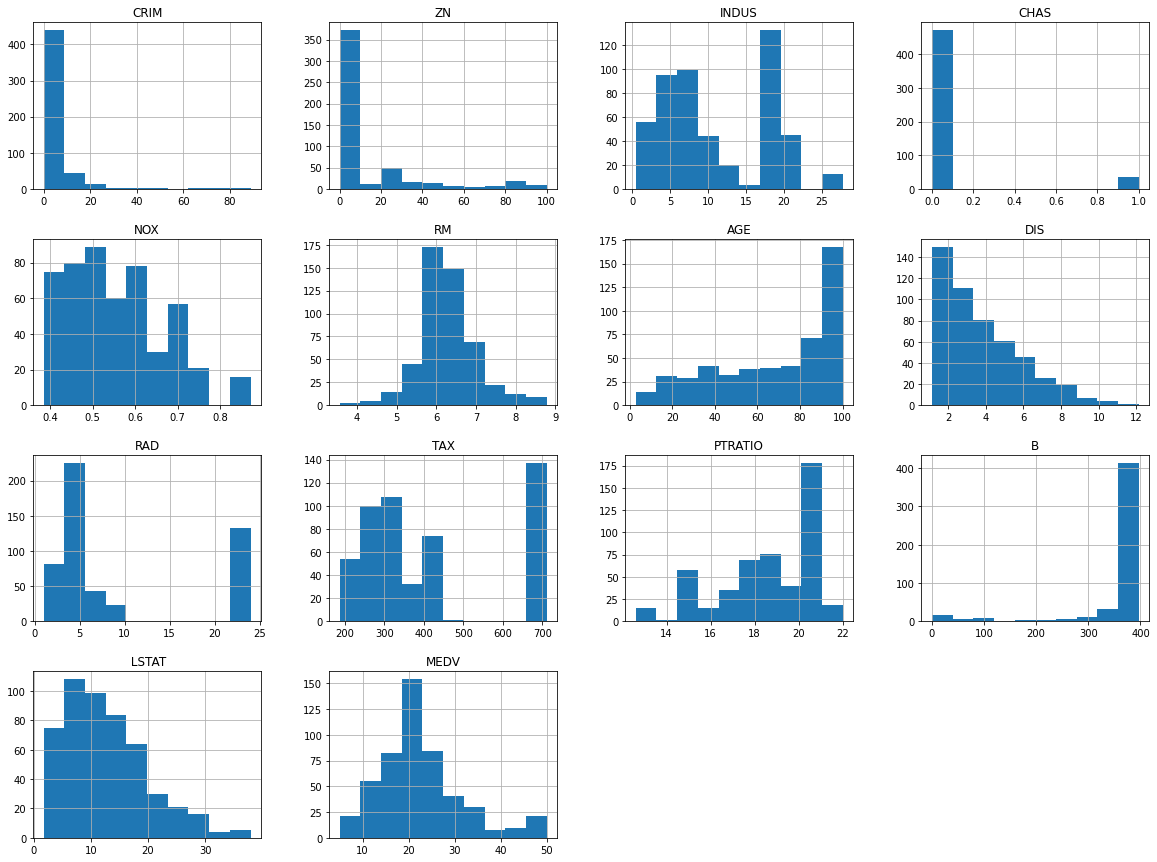

In [490]:
%matplotlib inline                       
import matplotlib.pyplot as plt
df.hist(figsize=(20,15))


# **this is the manual way how train test split is done**

In [491]:
#this is the manual way how train test split is done
import numpy as np
def train_test_split(data,ratio):
  shuffle=np.random.permutation(len(data))
  np.random.seed(42)
  test_size_index=int(len(data)*ratio)
  test_indices=shuffle[:test_size_index]
  train_indices=shuffle[test_size_index:]
  
  return data.iloc[train_indices],data.iloc[test_indices]

In [492]:
train_set, test_set=train_test_split(df,0.2)

In [493]:
print(f"rows in trainset:{len(train_set)} \n rows in testset: {len(test_set)}")

rows in trainset:405 
 rows in testset: 101


# **train test split using library**

In [494]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

# **stratified shuffle**

MAY BE HAPPENED THAT TRAIN DATA BELONGS TO ONLY ONE CLASS 
SO OUR TRAINING MODEL WILL BE NOT BE TRAIN ON ZERO CLASSNew Section thats why we do stratified shuffle 

In [495]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]


In [496]:
df=strat_train_set
df_test=strat_test_set

In [497]:
df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [498]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [499]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [500]:
95/7

13.571428571428571

In [501]:
376/28

13.428571428571429

# **correlation this is a pearson correlation means the target attribute increase with the attribute or target value decrease with the attribute

In [502]:
matrix=df.corr()

In [503]:
'''this is pearson correlation'''
matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677189
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
 LSTAT    -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f872329c050>,
      dtype=object)

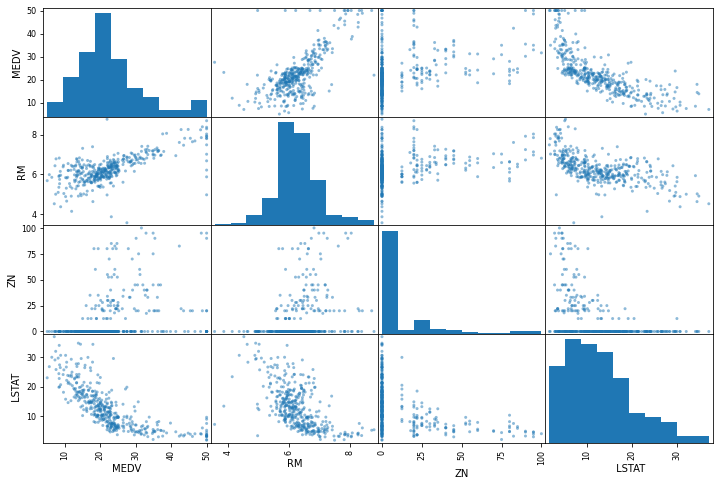

In [504]:
from pandas.plotting import scatter_matrix
attri=['MEDV','RM','ZN',' LSTAT']
scatter_matrix(df[attri],figsize = (12,8))

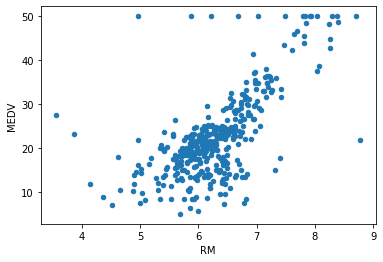

In [505]:
df.plot(kind='scatter' , x='RM' , y='MEDV')

**can column by combination of two column **

In [506]:
#df['tax-PER-ROOM']=df['TAX']/df['RM']

In [507]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,NaN,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [508]:
#df.plot(kind='scatter', x='tax-PER-ROOM', y='MEDV' ,alpha=0.8)

In [509]:
#df

In [510]:
df_label=df['MEDV'].copy()

In [511]:
df_label.count()

404

In [512]:
df=df.drop('MEDV',axis=1)


In [513]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,NaN,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


# **missing values**

In [514]:
#drop the data points, since the datapoints are very less so we drop it
#remove the column but if the significance of attribute is large so we can't drop it
#replace null value to some other value like mean

**Remove missing value manually**

In [515]:
a=df.dropna(subset=['RM'])
a.shape

(398, 13)

In [516]:
a=df.drop(['RM'], axis=1)
a.shape

(404, 12)

In [517]:
#median=df['RM'].median()

In [518]:
#median

In [519]:
#df=df['RM'].fillna(median)

In [520]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,NaN,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


 **remove missing value with help of library**

In [521]:
from sklearn.impute  import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [522]:
x=imputer.transform(df)
df_trans=pd.DataFrame(x ,columns=df.columns)

In [523]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12   LSTAT   404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


# **scikit-learn**

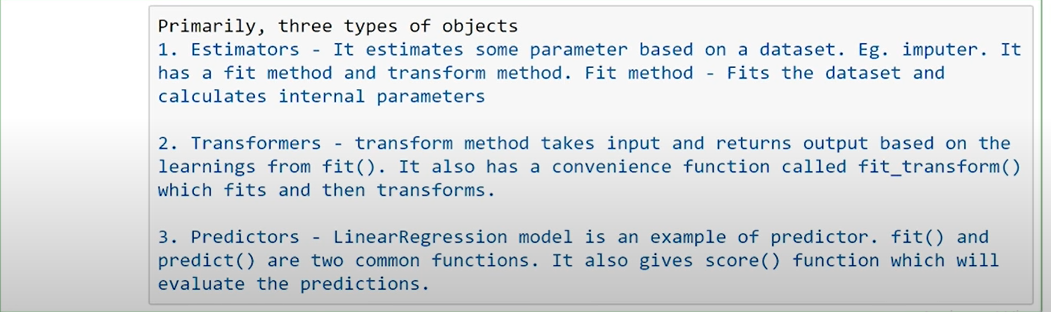

# **CREATING PIPELINE**

#  It can be used to automate a machine learning workflow. The pipeline can involve pre-processing, feature selection, classification/regression, and post-processing.New Section

Feature scaling
1-Min-max scaling(Normalization)
  val-min/max-min

2-standardization
 (value--mean)/std

here we prefer standization because in normalization if min and max value change so it has some negative impact that why we choose standardarization


In [524]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
mypipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scalar',StandardScaler())
])

In [525]:
df_pipe=mypipeline.fit_transform(df)

In [526]:
df_pipe

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

**Selecting a model for real state problem**

In [527]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(df_pipe,df_label)

RandomForestRegressor()

In [528]:
some_data=df.iloc[:10]                                     #getting the traing data value
some_label=df_label.iloc[:10]

In [529]:
some_label

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
411    17.2
250    24.4
100    27.5
429     9.5
57     31.6
Name: MEDV, dtype: float64

In [530]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,NaN,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [531]:
prepared_data=mypipeline.transform(some_data)

In [532]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23785628, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.50649954, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.29322112,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.14067761, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.05028146, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752],
       [ 1.29156014, -0.489831

In [533]:
pred=model.predict(prepared_data)

In [534]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0, 17.2, 24.4, 27.5, 9.5, 31.6]

**evaluate the model**

In [535]:
from sklearn.metrics import mean_squared_error


In [536]:
lin_mse=mean_squared_error(some_label,pred)

In [537]:
lin_mse

0.32848939999999793

# **cross validation**

In [538]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,some_data,some_label,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)

In [539]:
rmse_score

array([3.047, 1.026, 0.488, 0.931, 0.629, 2.893, 1.196, 6.748, 8.107,
       7.659])

In [540]:
def print_scores(scores):
  print('scores',scores)
  print('mean',scores.mean())
  print('Standard dev',scores.std())

In [541]:
print_scores(rmse_score)

scores [3.047 1.026 0.488 0.931 0.629 2.893 1.196 6.748 8.107 7.659]
mean 3.2723999999999984
Standard dev 2.9063811243537905


In [542]:
import joblib
joblib.dump(model, 'Dragan.sav')

['Dragan.sav']

RegressionDecisionTree
scores [2.6 7.1 7.7 4.4 1.4 7.7 1.4 3.1 7.2 7.1]
mean 4.97
Standard dev 2.527469089820883



LINEAR REGRESSION
scores [ 6.41767971  2.60963686 31.54857377  2.88584437  2.06952679  2.19325722
1.46354846  9.38995587  2.05460007  7.04985456]
mean 6.7682477684242315
Standard dev 8.642187441895038

RANDOM FOREST
scores [3.047 1.026 0.488 0.931 0.629 2.893 1.196 6.748 8.107 7.659]
mean 3.2723999999999984
Standard dev 2.9063811243537905

**Testing**

In [543]:
x_test=strat_test_set.drop('MEDV' ,axis=1)
y_test=strat_test_set['MEDV'].copy()
x_test_pre=mypipeline.transform(x_test)
finalPred=model.predict(x_test_pre)
finalmse=mean_squared_error(y_test,finalPred)
final_rmse=np.sqrt(finalmse)
final_rmse

2.8027884277248294